In [1]:
from test_generator import generate_grid
from grid_detector import detect_grid
from plotters import dump_points, plot_grid
from tqdm import tqdm

In [ ]:
# Generate one grid, analyze it and save points with and without detected elements

points, dims = generate_grid()
dump_points(points, "in")

grid = detect_grid(points, bin_width=0.5)

if grid == None:
    print("EXPECTED:", dims, "PREDICTED: None")
    dump_points(points, "out")
else:
    print("EXPECTED:", dims, "PREDICTED:", grid.dims)
    plot_grid(points, grid, "out")

In [ ]:
# Run tests

N_TESTS = 1000
correct = 0

for i in tqdm(range(N_TESTS)):
    points, dims = generate_grid()
    grid = detect_grid(points, bin_width=0.9)

    if grid != None and (dims == grid.dims).all():
        correct += 1

print("%correct:", correct/N_TESTS)

100%|██████████| 1000/1000 [00:01<00:00, 539.57it/s]

%correct: 0.958


In [ ]:
# Generate and save test samples without making predictions
N_SAMPLES = 12

for i in range(N_SAMPLES):
    dump_points(generate_grid()[0])
N_DUMPS = 0

[0.008317232131958008, 0.012732982635498047, 0.020261764526367188, 0.027411460876464844, 0.033753156661987305, 0.04099130630493164, 0.047130584716796875, 0.05714821815490723, 0.06242084503173828]


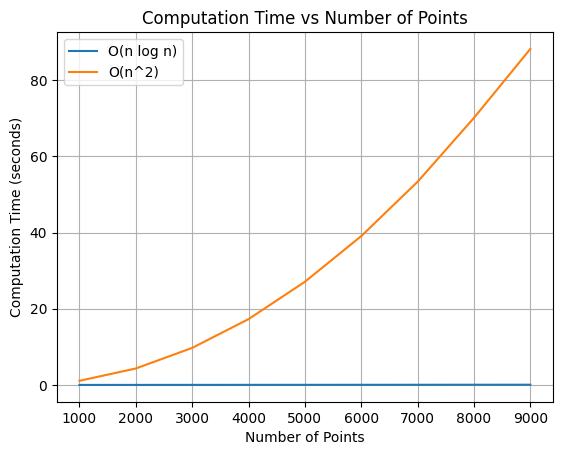

In [ ]:
from utils import min_distance

import time
import matplotlib.pyplot as plt
import math
import numpy as np

# O(n^2) brute-force algorithm
def min_distance_n2(points):
    min_dist = float('inf')
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            dist = np.linalg.norm(points[i] - points[j])
            if dist < min_dist:
                min_dist = dist
    return min_dist

# Test fixture
def test_fixture(start, stop, step, num_tests):
    input_sizes = range(start, stop, step)
    times_nlogn = []
    times_n2 = []
    
    for n in input_sizes:
        nlogn_total_time = 0
        n2_total_time = 0
        
        for _ in range(num_tests):
            # Generate random points
            points = np.random.rand(n, 2)
            
            # Measure time for O(n log n) algorithm
            start_time = time.time()
            nlogn_result = min_distance(points)
            nlogn_total_time += time.time() - start_time
            
            # Measure time for O(n^2) algorithm
            start_time = time.time()
            n2_result = min_distance_n2(points)
            n2_total_time += time.time() - start_time
            
            # Verify that both algorithms return the same result
            assert math.isclose(nlogn_result, n2_result, rel_tol=1e-9), "Results do not match!"
        
        # Average time for each algorithm
        times_nlogn.append(nlogn_total_time / num_tests)
        times_n2.append(n2_total_time / num_tests)
    
    print(times_nlogn)
    # Plot results
    plt.plot(input_sizes, times_nlogn, label="O(n log n)")
    plt.plot(input_sizes, times_n2, label="O(n^2)")
    plt.xlabel("Number of Points")
    plt.ylabel("Computation Time (seconds)")
    plt.title("Computation Time vs Number of Points")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
test_fixture(start=1000, stop=10000, step=1000, num_tests=1)